<a href="https://colab.research.google.com/github/annkvth/kompleteNetze/blob/main/networkxTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ein kleines Beispiel-Notebook mit Networkx

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

Generate random graph with 20 nodes and probability of edge creation 0.3

In [ ]:
n = 20
p = 0.3
graph = nx.erdos_renyi_graph(n, p)

First draw the graph we created

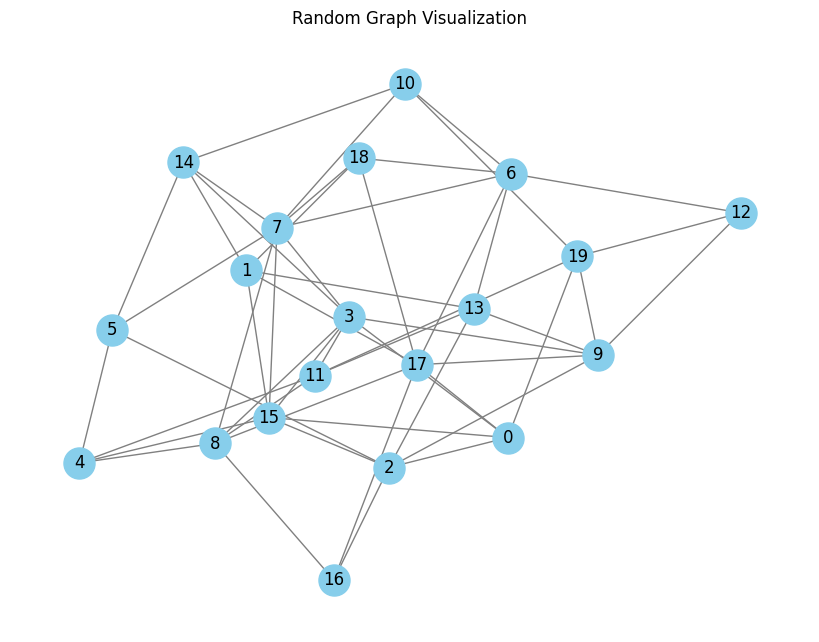

In [ ]:
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Random Graph Visualization")
plt.show()

Calculate the clustering coefficient for each node, and the average clustering coefficient for the entire graph


In [ ]:
clustering_coefficients = nx.clustering(graph)

average_clustering = nx.average_clustering(graph)

Output the results

In [ ]:
print("Clustering coefficients for each node:", clustering_coefficients)

print("Average clustering coefficient:", average_clustering)

Clustering coefficients for each node: {0: 0.2, 1: 0.1, 2: 0.13333333333333333, 3: 0.23809523809523808, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.2, 7: 0.25, 8: 0.26666666666666666, 9: 0.13333333333333333, 10: 0.3333333333333333, 11: 0.2, 12: 0.3333333333333333, 13: 0.1, 14: 0.3, 15: 0.2, 16: 0.3333333333333333, 17: 0.14285714285714285, 18: 0.5, 19: 0.1}
Average clustering coefficient: 0.21988095238095234
